# Comparison of Classification Algorithm

# Library


In [209]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [1]:
!pip3 install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 877.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=253518b4f3b7703bfd7f215557f0e498d81632551c6b01bf833c5e6e8775293d
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [210]:
# Required Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from mlxtend.plotting import plot_decision_regions

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# Data

In [99]:
df = pd.read_csv('/content/cirrhosis.csv', sep=',')

In [54]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Data Preprocessing

In [ ]:
# Jumlah kolom dan baris
df.shape

(418, 20)

In [ ]:
#Kolom pada data frame
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
# Check if there are any duplicates
df.duplicated("ID").sum()

0

In [ ]:
# Melihat Type Data, Missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df.describe(include='all')

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418,312,418.000000,418,312,312,312,418,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
unique,NaN,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,232,158,NaN,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209.500000,1917.782297,NaN,NaN,18533.351675,NaN,NaN,NaN,NaN,NaN,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,NaN,NaN,3815.845055,NaN,NaN,NaN,NaN,NaN,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,NaN,NaN,15644.500000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,NaN,NaN,18628.000000,NaN,NaN,NaN,NaN,NaN,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,NaN,NaN,21272.500000,NaN,NaN,NaN,NaN,NaN,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000


# Handle missing value

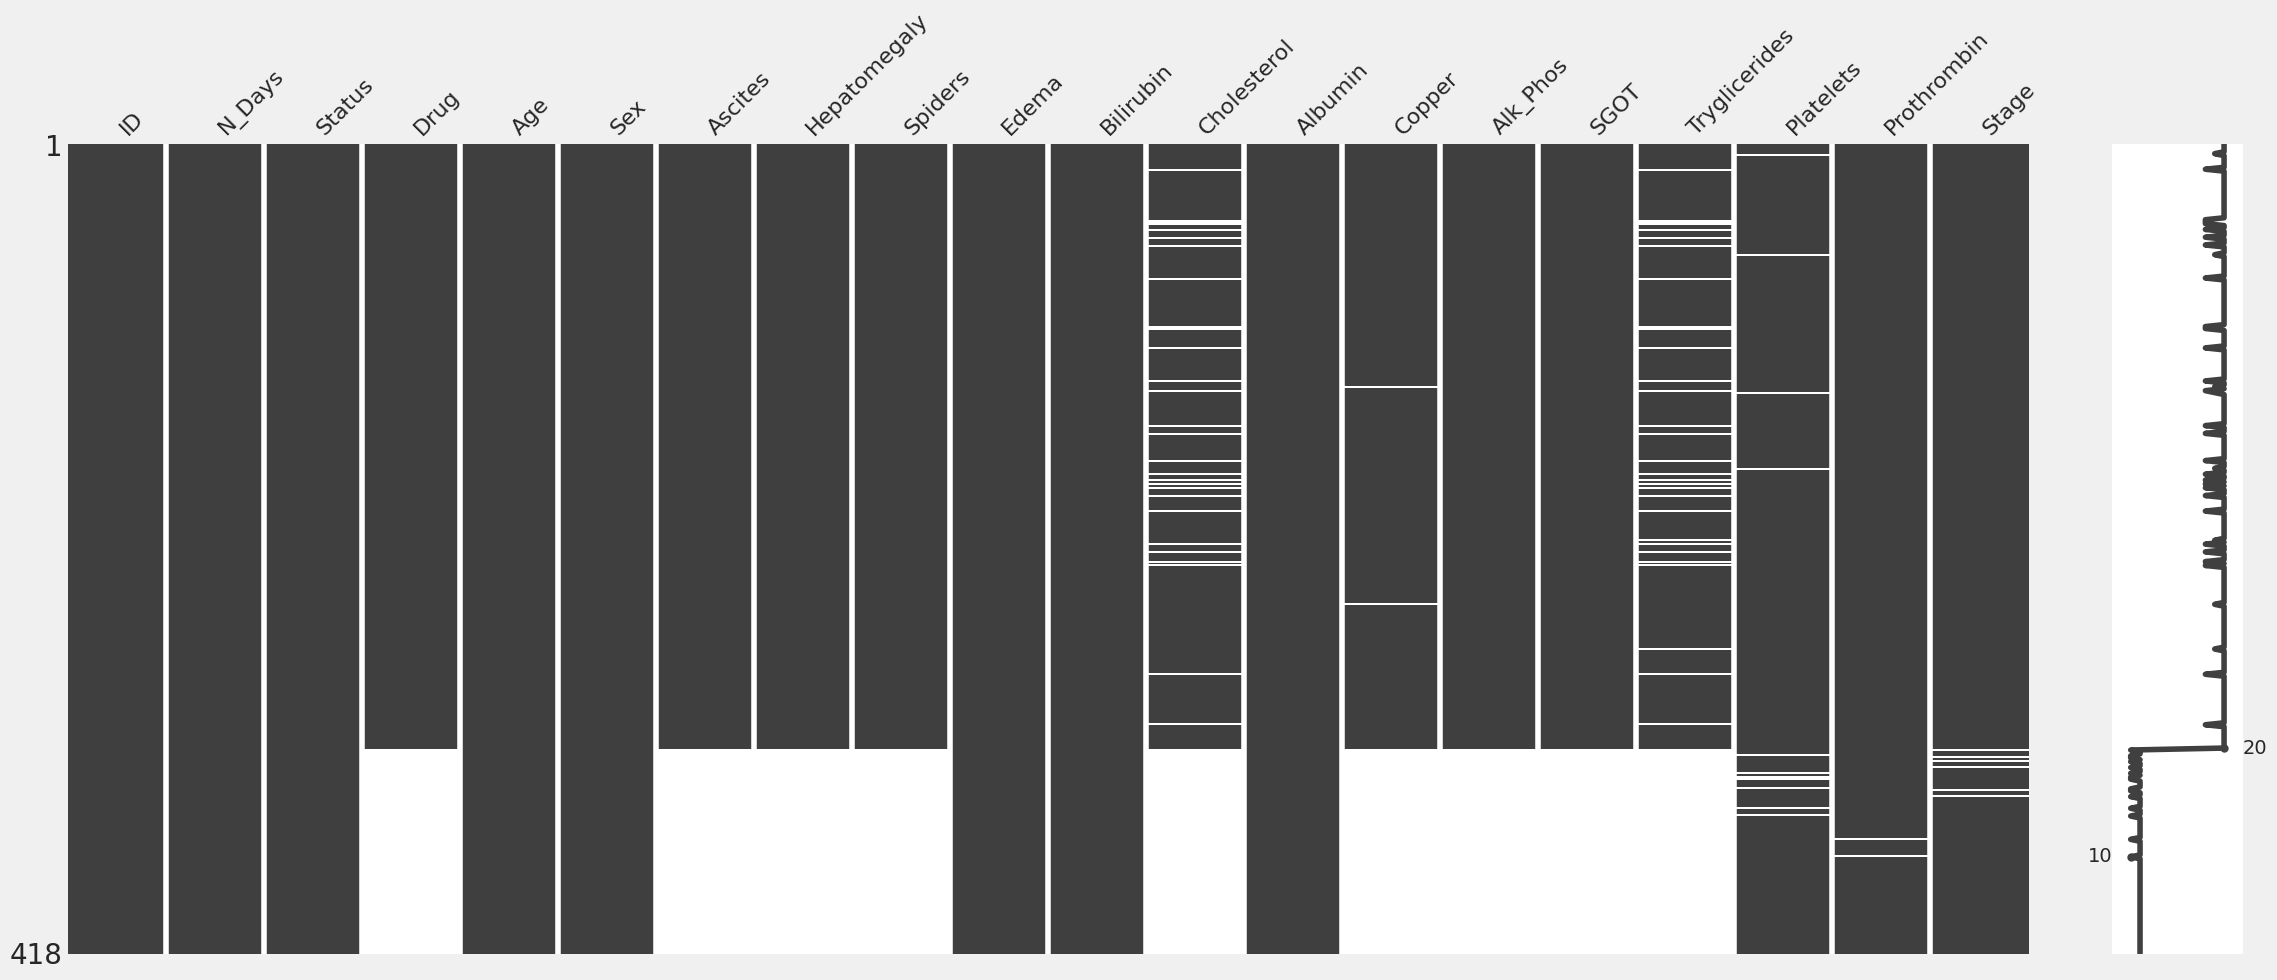

<Figure size 1500x900 with 0 Axes>

In [ ]:
# Visualisasi missing value
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

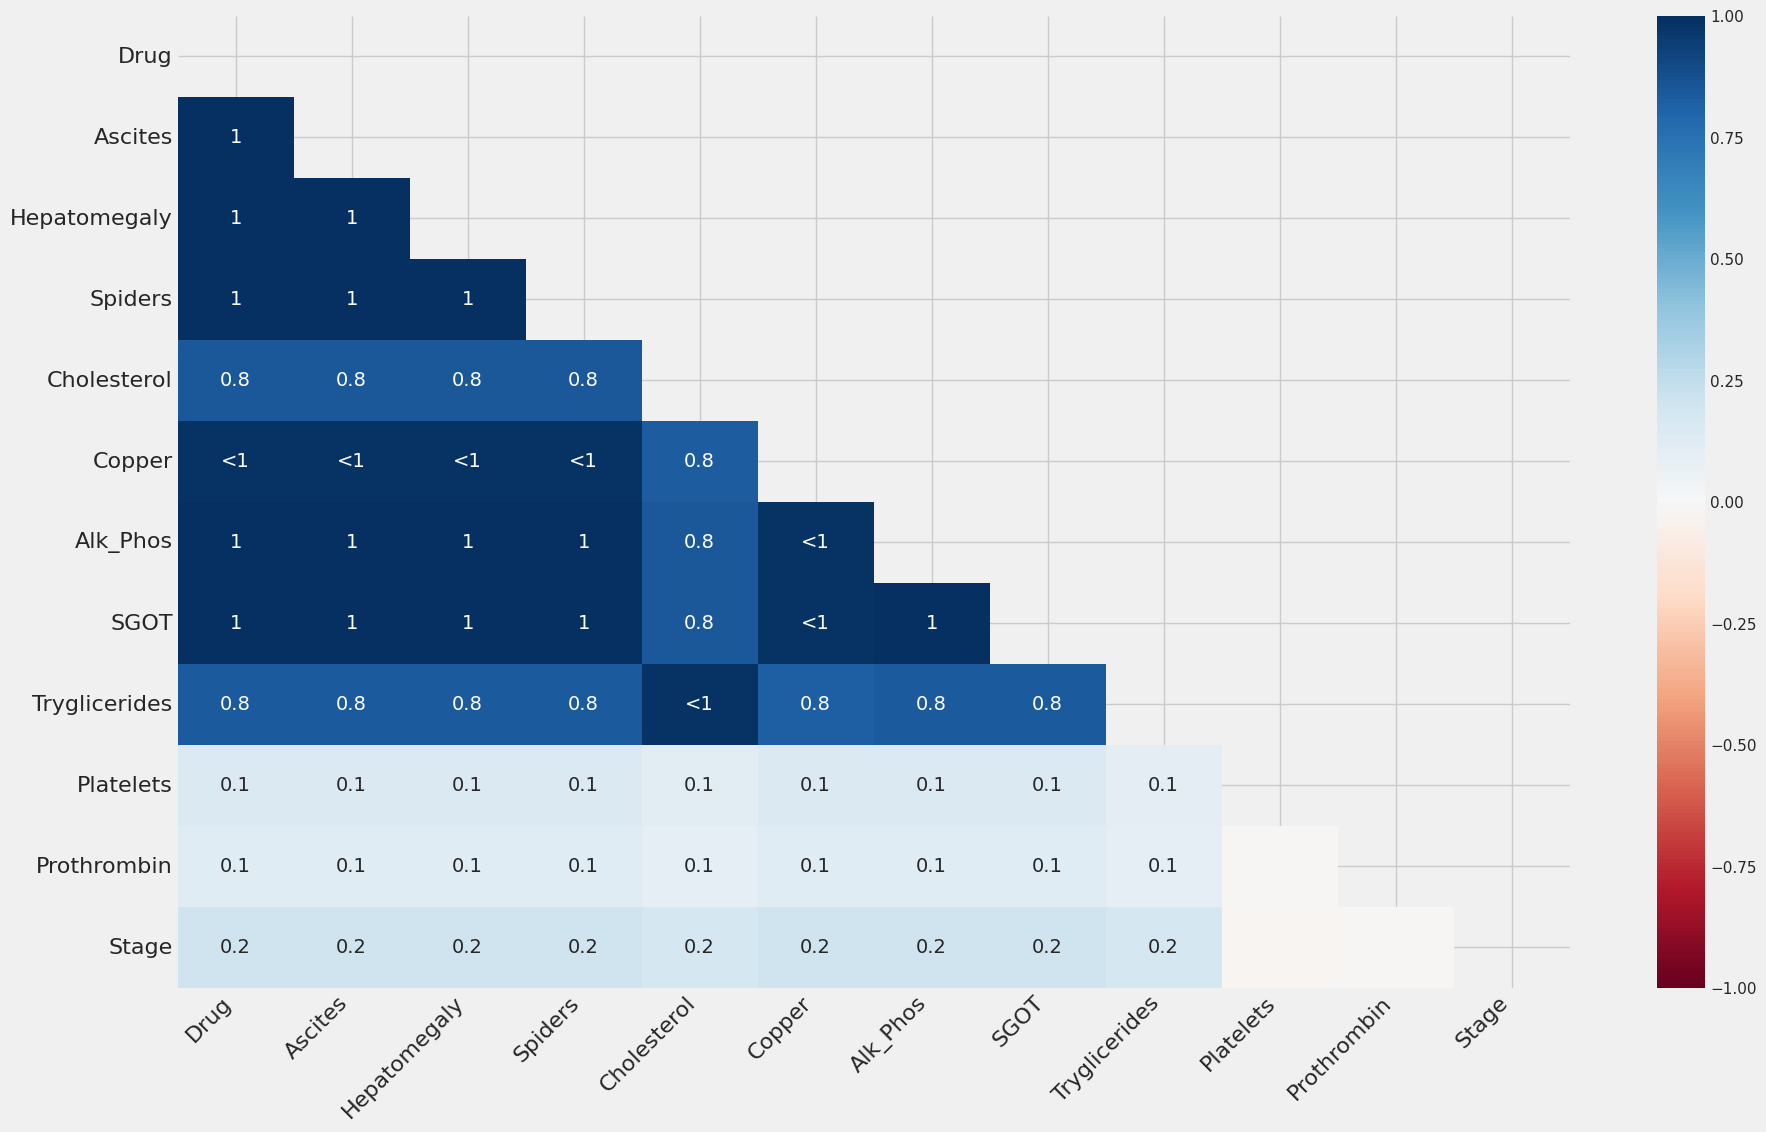

In [ ]:
#Heat map
msno.heatmap(df, labels = True)

In [ ]:
# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['Drug',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Cholesterol',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

<Axes: >

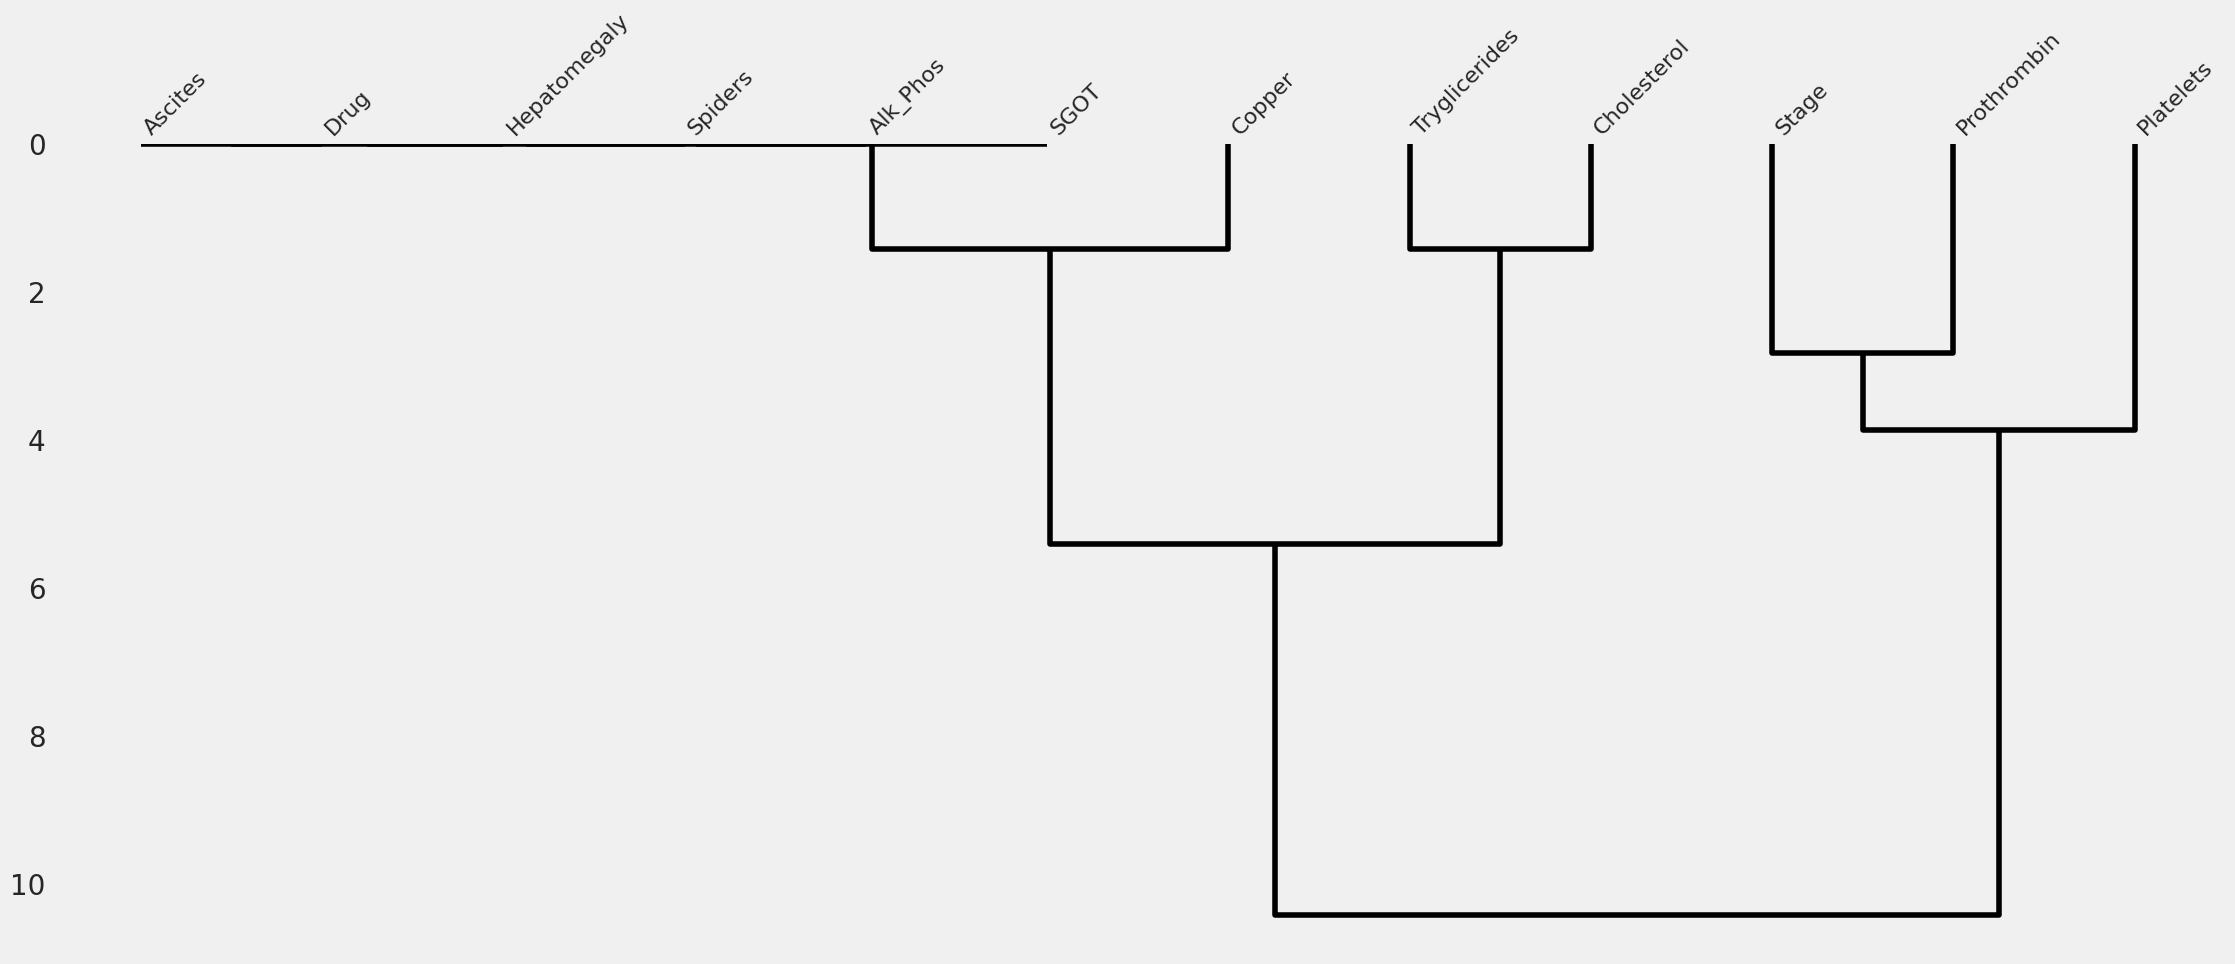

In [ ]:
msno.dendrogram(df[missing_columns])

In [ ]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
missing_percent = get_numerical_summary(df)

Drug : 106 (25.359%)
Ascites : 106 (25.359%)
Hepatomegaly : 106 (25.359%)
Spiders : 106 (25.359%)
Cholesterol : 134 (32.057%)
Copper : 108 (25.837%)
Alk_Phos : 106 (25.359%)
SGOT : 106 (25.359%)
Tryglicerides : 136 (32.536%)
Platelets : 11 (2.632%)
Prothrombin : 2 (0.478%)
Stage : 6 (1.435%)


Metode mengatasi missing value terdapat 3, yaitu deletion data, encoding missingnes, dan imputation

Pada deletion data, terdapat 2 cara, yaitu menghapus atribut atau sampel

In [ ]:
#Deletion of Data (Atribut)
df_temp = df.copy()

# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 30 #25% in this case

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)

In [ ]:
_ = get_numerical_summary(df_temp)

Drug : 106 (25.359%)
Ascites : 106 (25.359%)
Hepatomegaly : 106 (25.359%)
Spiders : 106 (25.359%)
Copper : 108 (25.837%)
Alk_Phos : 106 (25.359%)
SGOT : 106 (25.359%)
Platelets : 11 (2.632%)
Prothrombin : 2 (0.478%)
Stage : 6 (1.435%)


In [ ]:
del df_temp  #Menghapus atribut dengan missing value diatas 30%

Menghapus sample

In [ ]:
#Delete sample
df_temp = df.copy()

In [ ]:
# Getting Missing count of each sample

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum()

In [ ]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 9

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 418
Samples After Removal : 312


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          312 non-null    object 
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      308 non-null    float64
 18  Prothrombi

In [ ]:
missing_percent = get_numerical_summary(df_temp)

Cholesterol : 28 (8.974%)
Copper : 2 (0.641%)
Tryglicerides : 30 (9.615%)
Platelets : 4 (1.282%)


Encoding Missingness

Mengatasi atribut yang bertipe object atau diskrit dengan membuat kategori baru yaitu "Missing Value"

In [ ]:
df_temp = df.copy()

In [ ]:
cat_missing_cols = [col for col in missing_columns if df_temp[col].dtype == 'object']
cat_missing_cols

['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']

In [ ]:
df_temp[cat_missing_cols] = df_temp[cat_missing_cols].fillna('Missing')
df_temp.Drug.value_counts()

D-penicillamine    158
Placebo            154
Missing            106
Name: Drug, dtype: int64

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    int64  
 3   Drug           418 non-null    int64  
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    int64  
 6   Ascites        418 non-null    int64  
 7   Hepatomegaly   418 non-null    int64  
 8   Spiders        418 non-null    int64  
 9   Edema          418 non-null    int64  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

Imputation Methode
1. KNN
2. Tree Based Imputation
3. Linear Models

In [ ]:
# KNN
from sklearn.impute import KNNImputer
df_temp = df.copy()

In [ ]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [ ]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)
knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [ ]:
X = knn.transform(df_temp)

In [ ]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
del df_temp

Trees imputation

In [ ]:
missing_columns

['Drug',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Cholesterol',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()

In [ ]:
df_temp = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred

    return df

In [ ]:
df_new = tree_imputation(df_temp)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    int64  
 3   Drug           418 non-null    int64  
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    int64  
 6   Ascites        418 non-null    int64  
 7   Hepatomegaly   418 non-null    int64  
 8   Spiders        418 non-null    int64  
 9   Edema          418 non-null    int64  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

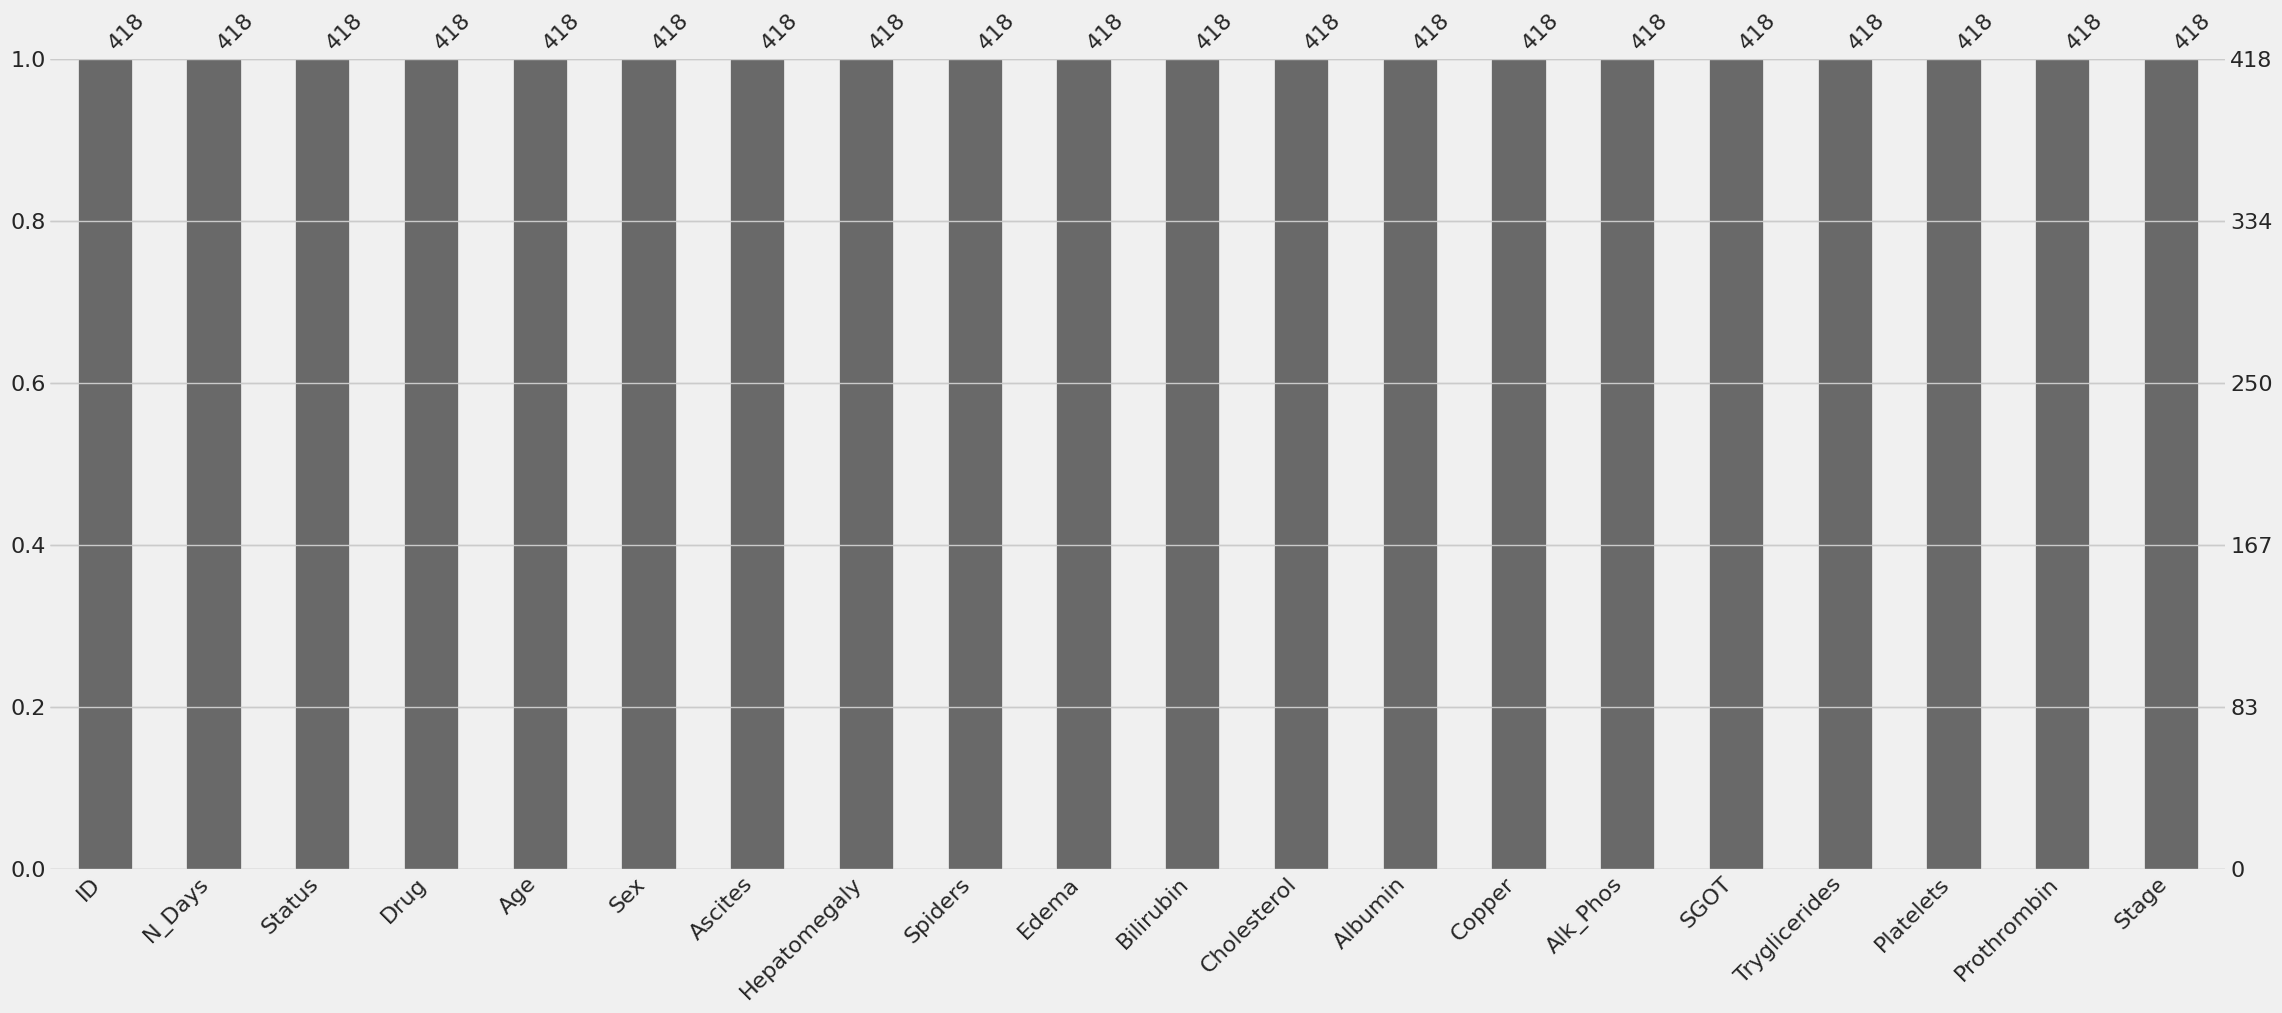

In [ ]:
msno.bar(df_new)
plt.show()

In [ ]:
df_new.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df_new = pd.concat([df[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head()

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D,D-penicillamine,F,Y,Y,Y,Y,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,C,D-penicillamine,F,N,Y,Y,N,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D,D-penicillamine,M,N,N,N,S,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D,D-penicillamine,F,N,Y,Y,S,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,CL,Placebo,F,N,Y,Y,N,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         418 non-null    object 
 1   Drug           312 non-null    object 
 2   Sex            418 non-null    object 
 3   Ascites        312 non-null    object 
 4   Hepatomegaly   312 non-null    object 
 5   Spiders        312 non-null    object 
 6   Edema          418 non-null    object 
 7   ID             418 non-null    int64  
 8   N_Days         418 non-null    int64  
 9   Age            418 non-null    int64  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

Mengisi missing value dengan mean, median, atau modus

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
df.describe(include='all')

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418,312,418.000000,418,312,312,312,418,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
unique,NaN,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,232,158,NaN,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209.500000,1917.782297,NaN,NaN,18533.351675,NaN,NaN,NaN,NaN,NaN,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,NaN,NaN,3815.845055,NaN,NaN,NaN,NaN,NaN,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,NaN,NaN,15644.500000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,NaN,NaN,18628.000000,NaN,NaN,NaN,NaN,NaN,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,NaN,NaN,21272.500000,NaN,NaN,NaN,NaN,NaN,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000


In [ ]:
df['Drug'].replace(np.nan,"D-penicillamine",inplace = True)
df['Ascites'].replace(np.nan,"N", inplace = True)
df['Hepatomegaly'].replace(np.nan,"Y", inplace = True)
df['Spiders'].replace(np.nan,"N", inplace = True)
df

In [ ]:
avg_col = df['Cholesterol'].mean()
avg_Copper = df['Copper'].mean()
df['Cholesterol'].replace(np.nan,avg_col, inplace = True)
df['Copper'].replace(np.nan,avg_Copper, inplace = True)

Kombinasi (Deletion sample + imputation)

In [100]:
df[df['Drug'].isnull()].index

Int64Index([312, 313, 314, 315, 316, 317, 318, 319, 320, 321,
            ...
            408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
           dtype='int64', length=106)

In [101]:
#Menghapus sample dari 312 - 418
df = df.drop(index=range(312,418))

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          312 non-null    object 
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      308 non-null    float64
 18  Prothrombi

In [103]:
df.describe(include='all')

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312,312,312.000000,312,312,312,312,312,312.000000,284.000000,312.000000,310.000000,312.000000,312.000000,282.000000,308.000000,312.000000,312.000000
unique,NaN,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,168,158,NaN,276,288,160,222,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,156.500000,2006.362179,NaN,NaN,18269.442308,NaN,NaN,NaN,NaN,NaN,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,90.210864,1123.280843,NaN,NaN,3864.805407,NaN,NaN,NaN,NaN,NaN,4.530315,231.944545,0.419892,85.613920,2140.388824,56.699525,65.148639,95.608742,1.004323,0.877880
min,1.000000,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,NaN,NaN,15427.750000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.310000,41.250000,871.500000,80.600000,84.250000,199.750000,10.000000,2.000000
50%,156.500000,1839.500000,NaN,NaN,18187.500000,NaN,NaN,NaN,NaN,NaN,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,234.250000,2697.250000,NaN,NaN,20715.000000,NaN,NaN,NaN,NaN,NaN,3.425000,400.000000,3.800000,123.000000,1980.000000,151.900000,151.000000,322.500000,11.100000,4.000000


In [104]:
avg_col = df['Cholesterol'].mean()
avg_Copper = df['Copper'].mean()
avg_Try = df['Tryglicerides'].mean()
avg_Plat = df['Platelets'].mean()
df['Cholesterol'].replace(np.nan,avg_col, inplace = True)
df['Copper'].replace(np.nan,avg_Copper, inplace = True)
df['Tryglicerides'].replace(np.nan,avg_Try, inplace = True)
df['Platelets'].replace(np.nan,avg_Plat, inplace = True)

# EDA
Analisis Data Eksplorasi

In [105]:
#categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [106]:
# view frequency counts of values (Melihat frekuensi setiap atribut)
for var in categorical:

    print(df[var].value_counts())

C     168
D     125
CL     19
Name: Status, dtype: int64
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64
F    276
M     36
Name: Sex, dtype: int64
N    288
Y     24
Name: Ascites, dtype: int64
Y    160
N    152
Name: Hepatomegaly, dtype: int64
N    222
Y     90
Name: Spiders, dtype: int64
N    263
S     29
Y     20
Name: Edema, dtype: int64


In [62]:
# data frame berdasarkan status C
df_statusC = df[df["Status"]=="C"]
df_statusC.shape

(168, 20)

In [63]:
# Frekuensi setiap atribut untuk Kategori Status C
categorical = [var for var in df_statusC.columns if df_statusC[var].dtype=='O']
for var in categorical:

    print(df_statusC[var].value_counts())

C    168
Name: Status, dtype: int64
Placebo            85
D-penicillamine    83
Name: Drug, dtype: int64
F    157
M     11
Name: Sex, dtype: int64
N    167
Y      1
Name: Ascites, dtype: int64
N    108
Y     60
Name: Hepatomegaly, dtype: int64
N    135
Y     33
Name: Spiders, dtype: int64
N    157
S     10
Y      1
Name: Edema, dtype: int64


In [18]:
# view probablity of in categorical variables
for var in categorical:

    print(df[var].value_counts()/np.float(len(df)))

C     0.538462
D     0.400641
CL    0.060897
Name: Status, dtype: float64
D-penicillamine    0.50641
Placebo            0.49359
Name: Drug, dtype: float64
F    0.884615
M    0.115385
Name: Sex, dtype: float64
N    0.923077
Y    0.076923
Name: Ascites, dtype: float64
Y    0.512821
N    0.487179
Name: Hepatomegaly, dtype: float64
N    0.711538
Y    0.288462
Name: Spiders, dtype: float64
N    0.842949
S    0.092949
Y    0.064103
Name: Edema, dtype: float64


In [ ]:
# check for cardinality in categorical variables
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Status  contains  3  labels
Drug  contains  2  labels
Sex  contains  2  labels
Ascites  contains  2  labels
Hepatomegaly  contains  2  labels
Spiders  contains  2  labels
Edema  contains  3  labels


In [ ]:
df["Status"].value_counts()

C     168
D     125
CL     19
Name: Status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
col = list(df.columns)

for i in col:
  df[i] = lb.fit_transform(df[i])

# Scatter Plot
sns.pairplot(df, hue='Status')

# PCA 1


In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import os
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [20]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


One Hot Encoder

Karena  Edema memiliki 3 label, maka lebih baik pengkodean menggunakan One hot encoder, dan yang lainnya menggunakan label encoder

In [107]:
# import category encoders
import category_encoders as ce

In [108]:
categori=df.select_dtypes(include='object')
categori.head()

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N


In [109]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(categori)
df1 = encoder.fit_transform(categori.iloc[:,-1])

In [110]:
df1.head()

,Edema_1,Edema_2,Edema_3
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [111]:
df2 = categori.iloc[:,:-1]
df2.head()

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders
0,D,D-penicillamine,F,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y
2,D,D-penicillamine,M,N,N,N
3,D,D-penicillamine,F,N,Y,Y
4,CL,Placebo,F,N,Y,Y


In [112]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
col = list(df2.columns)

for i in col:
  df2[i] = lb.fit_transform(df2[i])
df2.head()

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders
0,2,0,0,1,1,1
1,0,0,0,0,1,1
2,2,0,1,0,0,0
3,2,0,0,0,1,1
4,1,1,0,0,1,1


In [113]:
df.drop(df.select_dtypes(include='object'), axis=1)

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,22347,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,21294,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,22767,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,13879,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [118]:
df_new = pd.concat([df.drop(df.select_dtypes(include='object'),axis=1),df1,df2],axis=1)

In [119]:
df_new.head()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_1,Edema_2,Edema_3,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders
0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,1,0,0,2,0,0,1,1,1
1,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0,1,0,0,0,0,0,1,1
2,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,0,1,2,0,1,0,0,0
3,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0,0,1,2,0,0,0,1,1
4,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,0,1,0,1,1,0,0,1,1


In [123]:
collist=["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage","Edema_1","Edema_2","Edema_3","Drug","Sex","Ascites", "Hepatomegaly","Spiders","Status"]

In [124]:
df = df_new[collist]

In [125]:
df.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_1,Edema_2,Edema_3,Drug,Sex,Ascites,Hepatomegaly,Spiders,Status
0,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,1,0,0,0,0,1,1,1,2
1,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0,1,0,0,0,0,1,1,0
2,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,0,1,0,1,0,0,0,2
3,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0,0,1,0,0,0,1,1,2
4,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,0,1,0,1,0,0,1,1,1


PCA

In [126]:
def pca(data, target):
    df = data
    x = df.values
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=2)
    pc_values = pca.fit_transform(x)
    df_pca = pd.DataFrame(data = pc_values
             , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([df_pca, target], axis = 1)
    return finalDf

def viz_pca(finalDf):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)

    targets = finalDf['Status'].unique() # C, D, CL
    for target in targets:
        indicesToKeep = finalDf['Status'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , cmap='hsv'
                , s = 50)
    ax.legend(targets)
    ax.grid()

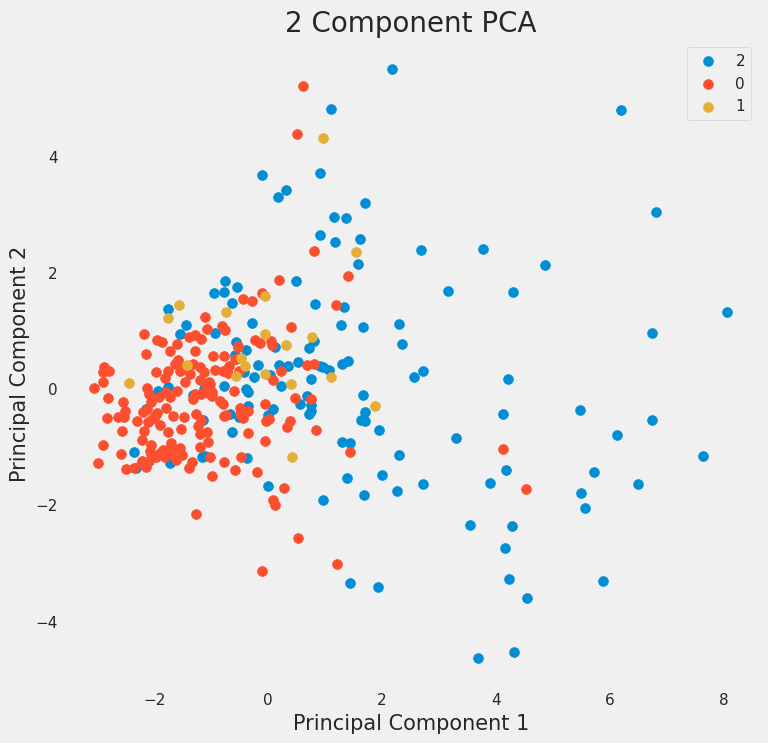

In [131]:
finalDf = pca(df.iloc[:,:-1], df.iloc[:,-1])
viz_pca(finalDf)

# HEAT MAP

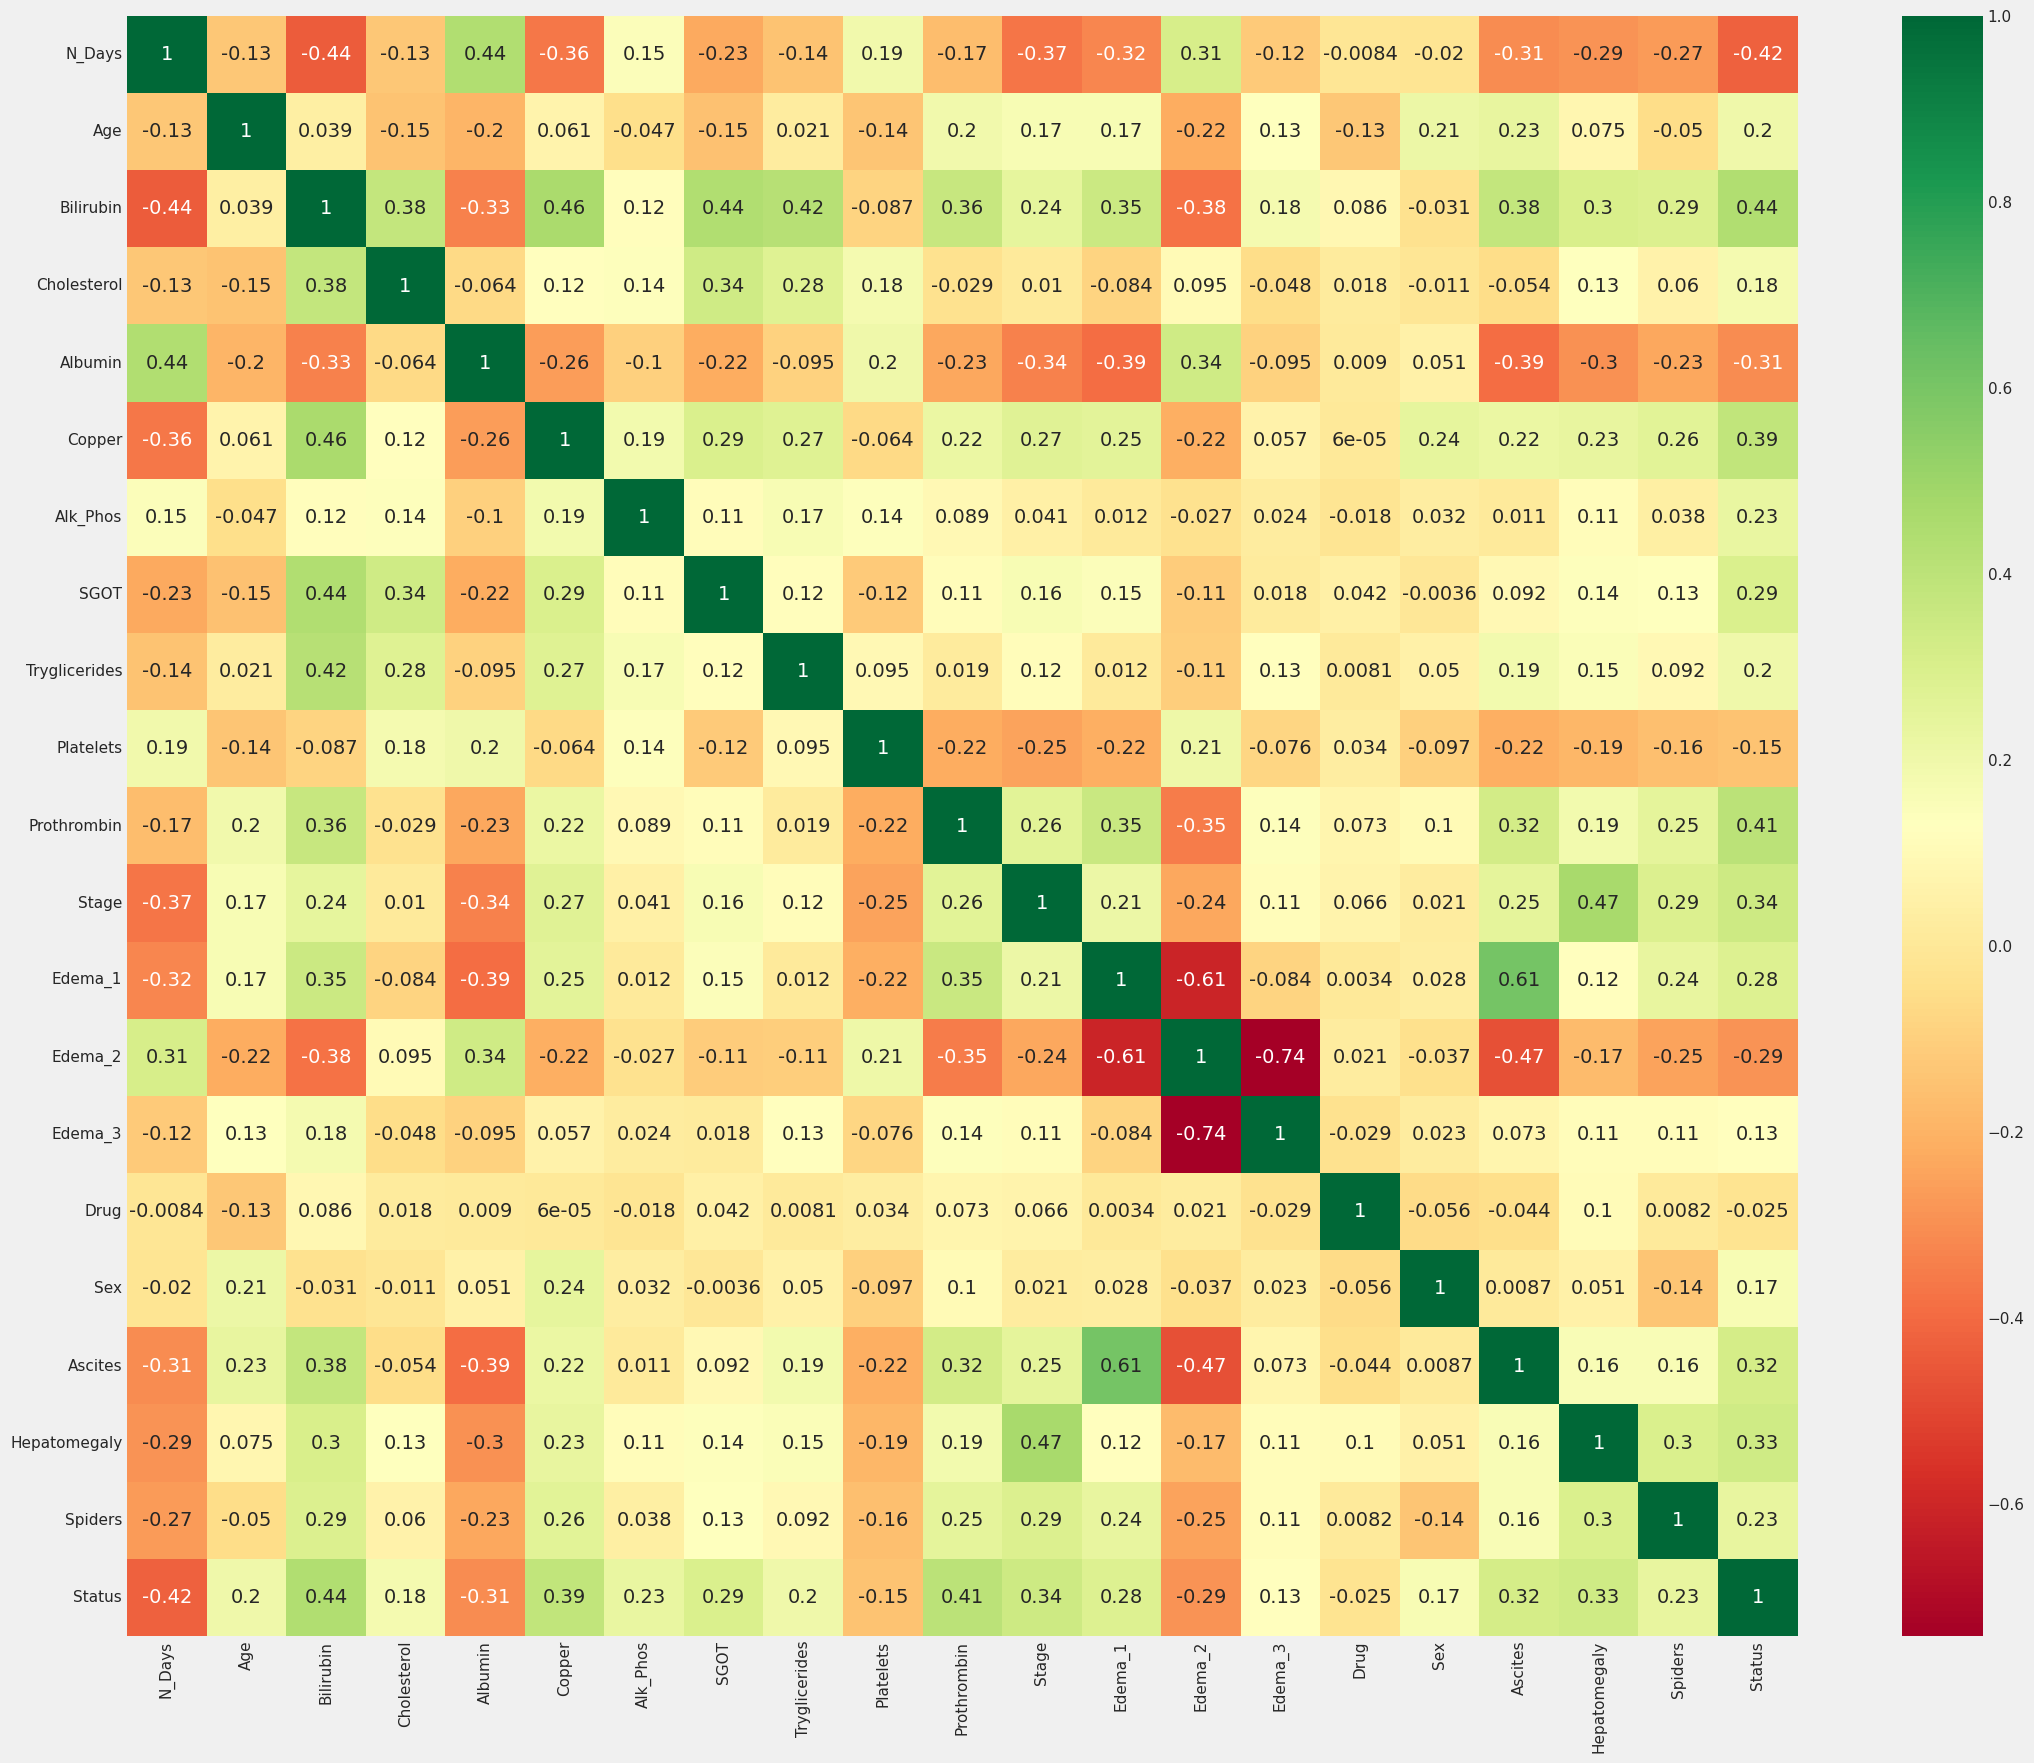

In [133]:
plt.figure(figsize=(24,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Edema_1', 'Edema_2', 'Edema_3', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Status_1', 'Status_2', 'Status_3']


In [ ]:
df.corr()

Text(0.5, 1.0, 'Correlation between different fearures')

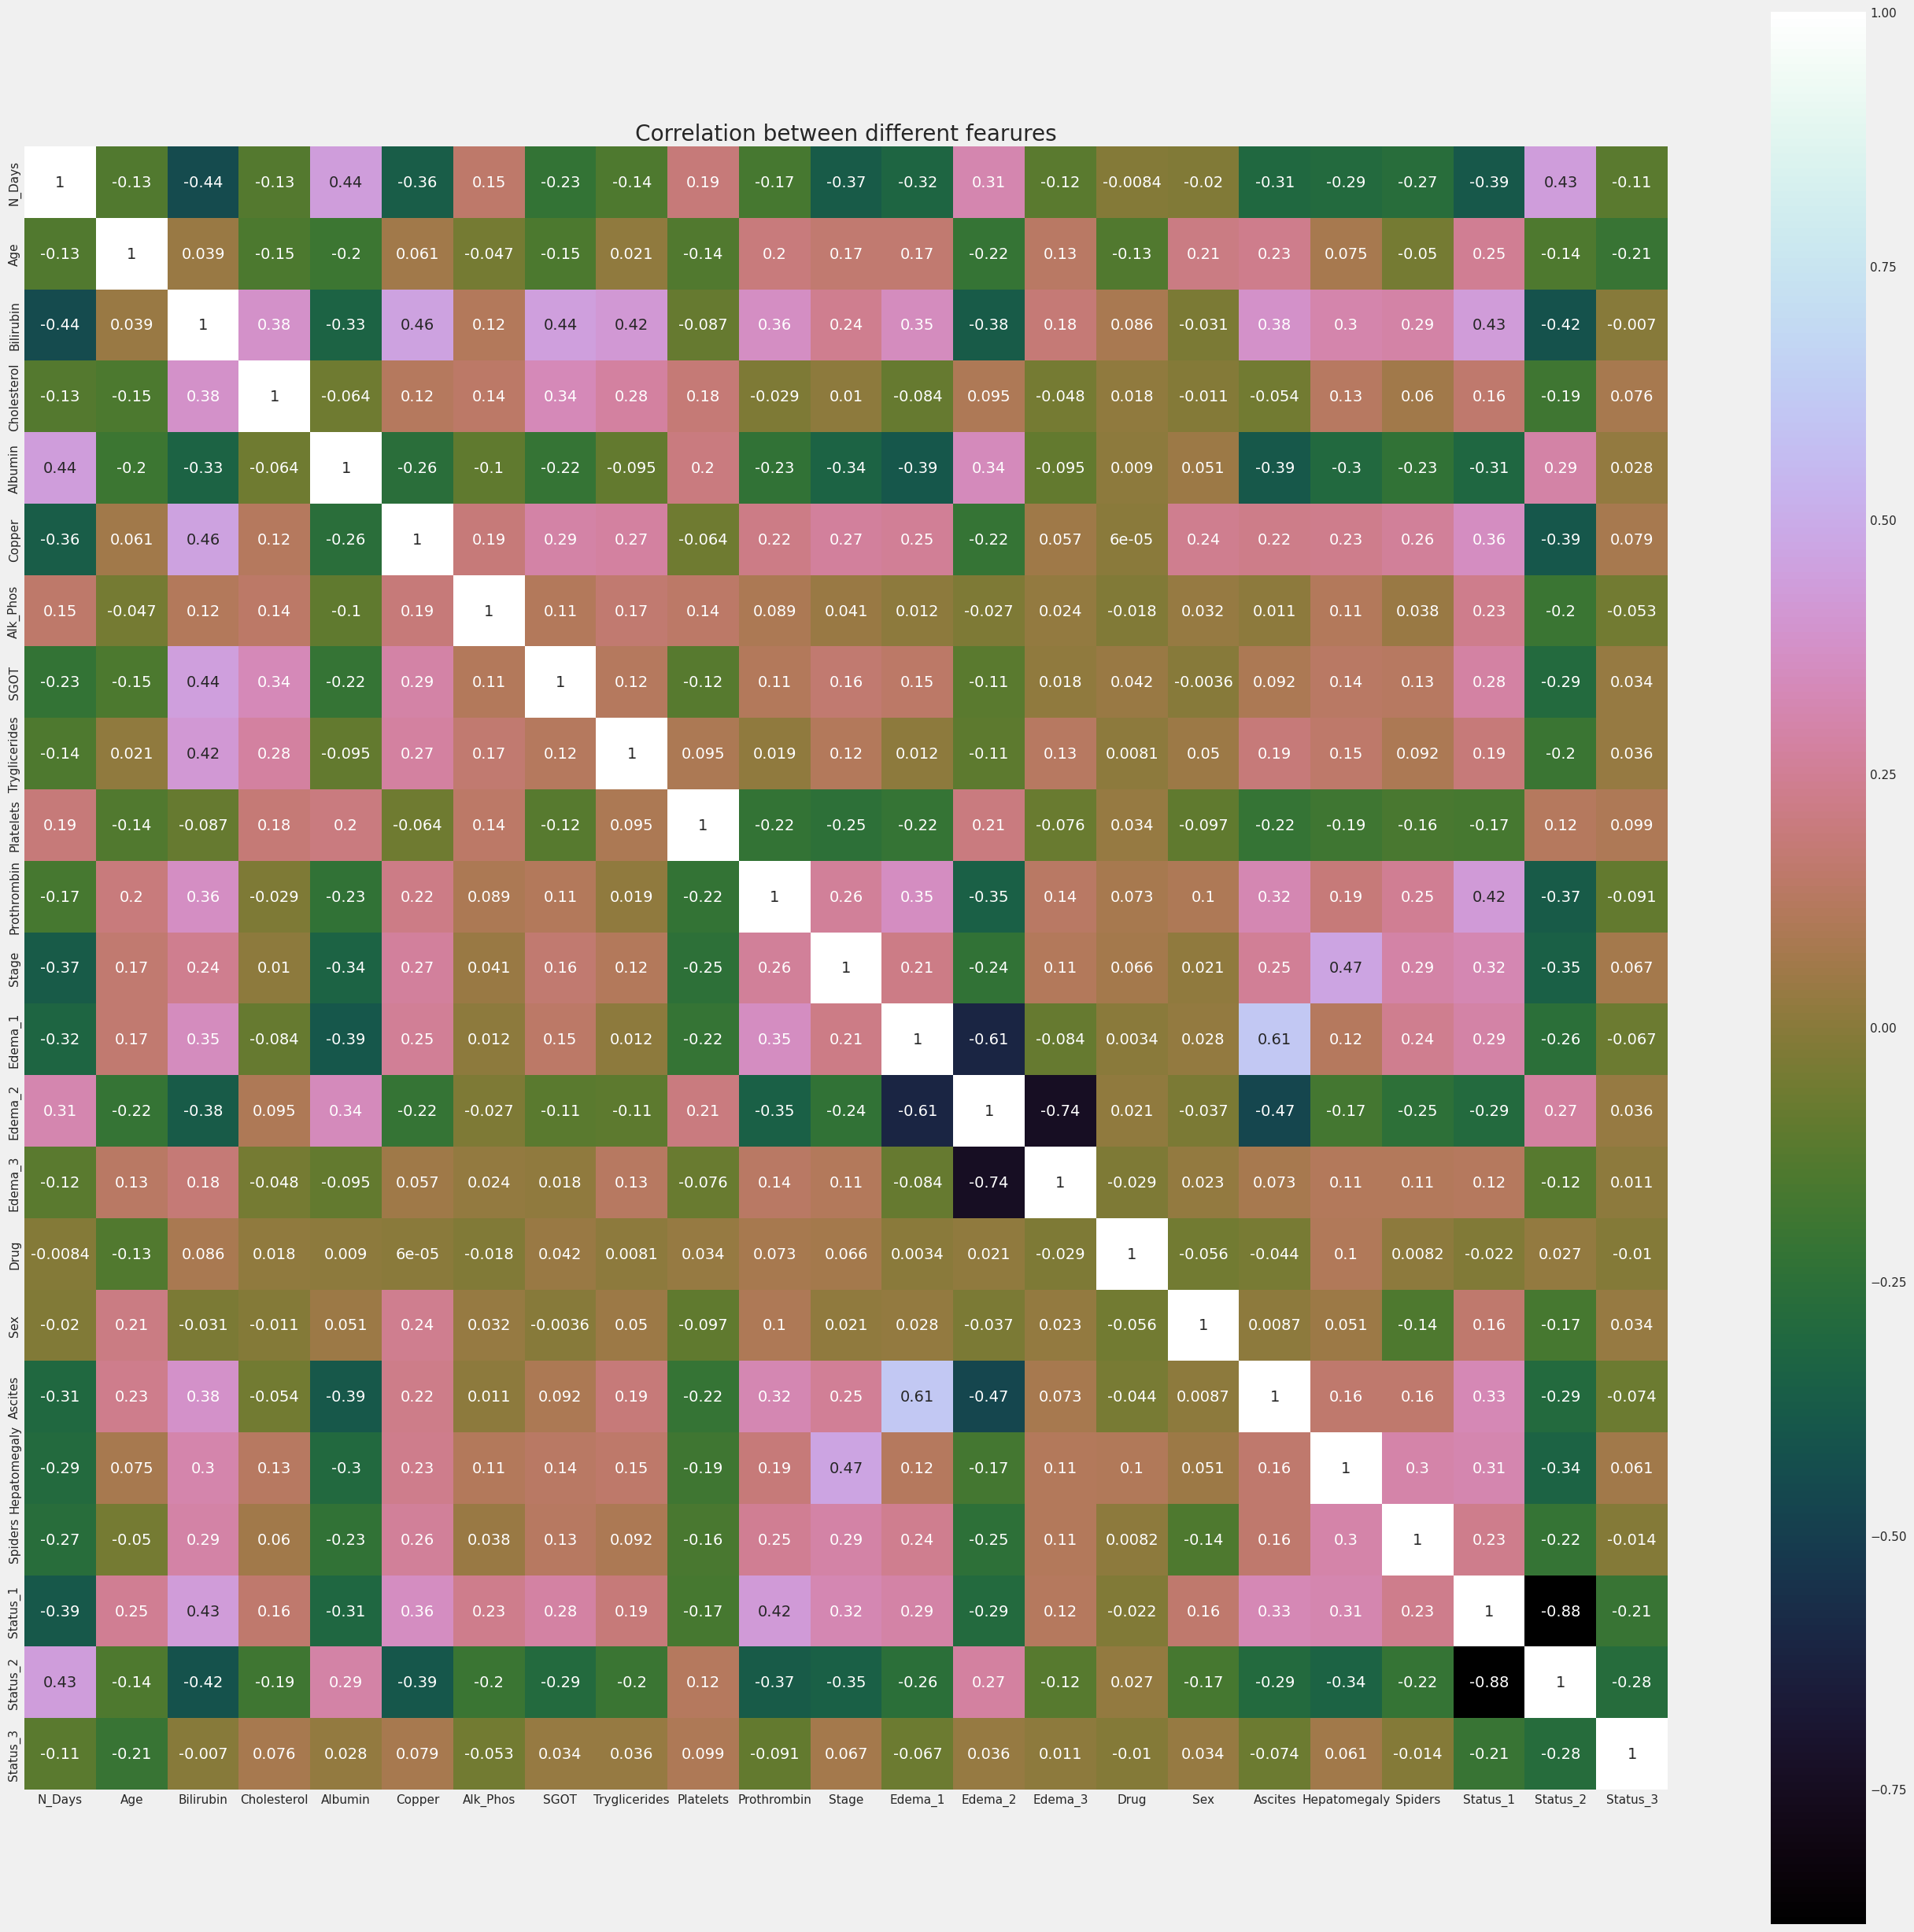

In [ ]:
correlation = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [ ]:
X = df.iloc[:,:-3].values
y = df.iloc[:,-4:-1].values
X

array([[4.0000e+02, 2.1464e+04, 1.4500e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [4.5000e+03, 2.0617e+04, 1.1000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0120e+03, 2.5594e+04, 1.4000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [9.3900e+02, 2.2767e+04, 1.7000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.3900e+02, 1.3879e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.8800e+02, 1.2109e+04, 6.4000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [ ]:
y

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std

array([[-1.43236012,  0.82790443,  2.48591366, ...,  3.46410162,
         0.97467943,  1.57056253],
       [ 2.22352556,  0.60839515, -0.47668941, ..., -0.28867513,
         0.97467943,  1.57056253],
       [-0.88665231,  1.89823892, -0.41036248, ..., -0.28867513,
        -1.02597835, -0.63671454],
       ...,
       [-0.9517449 ,  1.16559108, -0.34403554, ..., -0.28867513,
        -1.02597835, -0.63671454],
       [-1.04091285, -1.13783096, -0.27770861, ..., -0.28867513,
        -1.02597835, -0.63671454],
       [-1.0863885 , -1.59654574,  0.69508643, ..., -0.28867513,
        -1.02597835,  1.57056253]])

Dari PCA 1

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00321543e+00 -1.34111952e-01 -4.43213086e-01 -1.31016407e-01
   4.37250168e-01 -3.65318647e-01  1.49748546e-01 -2.26216587e-01
  -1.44987780e-01  1.91435916e-01 -1.68840406e-01 -3.72836468e-01
  -3.25034381e-01  3.13236479e-01 -1.18329910e-01 -8.38864413e-03
  -1.99321085e-02 -3.08122877e-01 -2.89067695e-01 -2.67259053e-01]
 [-1.34111952e-01  1.00321543e+00  3.87255478e-02 -1.49767077e-01
  -1.95892124e-01  6.14958009e-02 -4.73987676e-02 -1.50350575e-01
   2.09635173e-02 -1.38815887e-01  1.96930902e-01  1.68722435e-01
   1.68435637e-01 -2.19356482e-01  1.32789335e-01 -1.34673261e-01
   2.12052550e-01  2.32586871e-01  7.56102274e-02 -5.03078885e-02]
 [-4.43213086e-01  3.87255478e-02  1.00321543e+00  3.81783921e-01
  -3.35713897e-01  4.57979725e-01  1.17359738e-01  4.43150580e-01
   4.19849970e-01 -8.70872205e-02  3.62904734e-01  2.42142693e-01
   3.48804569e-01 -3.76604026e-01  1.77683914e-01  8.59721464e-02
  -3.07497050e-02  3.79511577e-01  3.02694856e-01  2.89

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00321543e+00 -1.34111952e-01 -4.43213086e-01 -1.31016407e-01
   4.37250168e-01 -3.65318647e-01  1.49748546e-01 -2.26216587e-01
  -1.44987780e-01  1.91435916e-01 -1.68840406e-01 -3.72836468e-01
  -3.25034381e-01  3.13236479e-01 -1.18329910e-01 -8.38864413e-03
  -1.99321085e-02 -3.08122877e-01 -2.89067695e-01 -2.67259053e-01]
 [-1.34111952e-01  1.00321543e+00  3.87255478e-02 -1.49767077e-01
  -1.95892124e-01  6.14958009e-02 -4.73987676e-02 -1.50350575e-01
   2.09635173e-02 -1.38815887e-01  1.96930902e-01  1.68722435e-01
   1.68435637e-01 -2.19356482e-01  1.32789335e-01 -1.34673261e-01
   2.12052550e-01  2.32586871e-01  7.56102274e-02 -5.03078885e-02]
 [-4.43213086e-01  3.87255478e-02  1.00321543e+00  3.81783921e-01
  -3.35713897e-01  4.57979725e-01  1.17359738e-01  4.43150580e-01
   4.19849970e-01 -8.70872205e-02  3.62904734e-01  2.42142693e-01
   3.48804569e-01 -3.76604026e-01  1.77683914e-01  8.59721464e-02
  -3.07497050e-02  3.79511577e-01  3.02694856e-0

Text(0.5, 1.0, 'Correlation between different features')

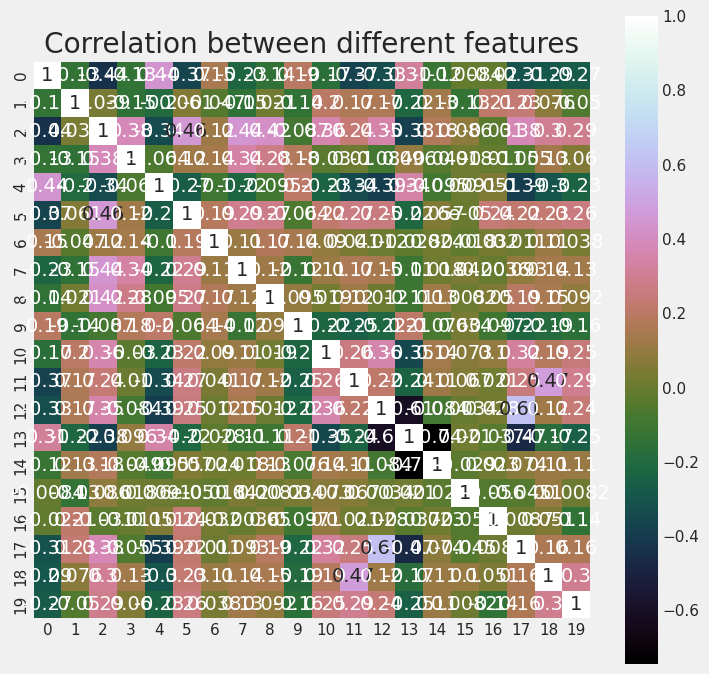

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.96234076e-01 -3.56794977e-02  1.76734650e-01  4.22213695e-02
   2.09039657e-04  4.15554609e-01  4.18637267e-02 -1.39686352e-01
  -1.98948141e-01  7.84023687e-02  2.68353381e-01 -1.93514257e-01
   1.61951295e-01 -4.89880804e-01  7.62104036e-02  4.68346712e-02
  -3.00197575e-01  4.02652234e-01  4.85293641e-02 -2.18970925e-16]
 [ 1.19662730e-01 -3.17186504e-01  1.57841969e-01 -1.42117935e-01
   3.59929323e-01 -9.97576264e-02 -2.12087236e-01  2.14900126e-01
   5.23789670e-02  2.50168830e-01  2.06680444e-01  3.22792808e-01
   9.56600121e-03  4.35488984e-02 -2.95103871e-01 -1.08720951e-01
  -5.05282886e-01 -8.18711209e-02  1.84797088e-01 -1.85953731e-16]
 [ 3.34948900e-01  2.76128118e-01  9.46831345e-02  1.46753107e-01
  -3.52502895e-02 -8.35042476e-02  1.16785010e-01  8.91201696e-02
  -7.77827070e-01 -1.75556599e-02  2.10341127e-01  4.80406114e-02
   5.11139747e-03  4.67411031e-02 -1.02543449e-01  8.99361165e-03
   7.67583383e-02 -8.14768341e-02  2.72126407e-01 -2.8141880

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.580680779713687
2.0974019684677696
1.454014345297396
1.3354859274140378
1.2729190363415714
1.1027594551468063
1.0349111742096544
0.9851580758976103
0.8563172784254847
0.797648591012789
0.7527554840253767
0.6506915814410514
0.5895319852595499
0.5379990469809119
0.49310532177320593
0.4686342084385201
0.4043271083464938
0.3693522090398106
0.28061510444028687
1.0258088215637284e-15


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [ ]:
var_exp

[22.829995552739703,
 10.453397631305716,
 7.246770214543116,
 6.656027619002661,
 6.344195838176746,
 5.496124848568221,
 5.157970756076966,
 4.910002589810208,
 4.2678633588193255,
 3.9754601250797683,
 3.751714030959813,
 3.2430301575026785,
 2.9382122983288483,
 2.681373455305508,
 2.4576242799914603,
 2.3356608785958306,
 2.015155940637174,
 1.8408419392849547,
 1.3985784852713024,
 -5.112604863883329e-15]

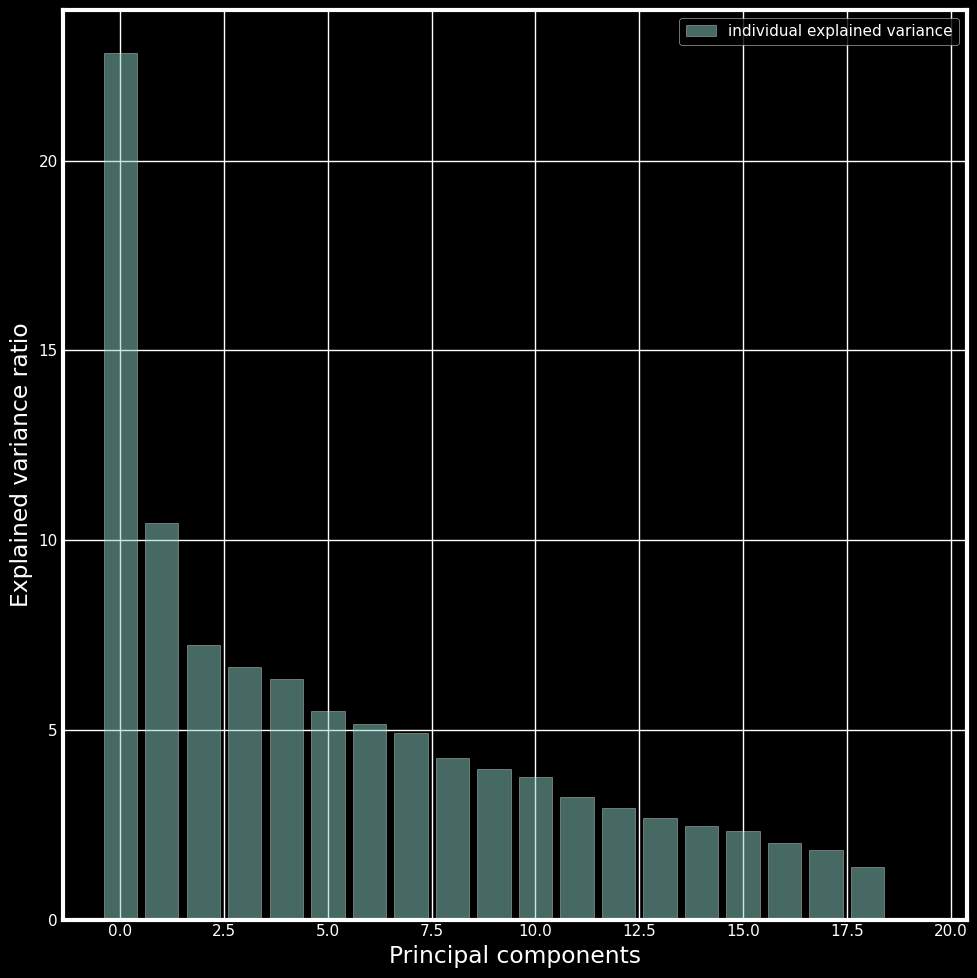

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 10))

    plt.bar(range(20), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Text(0, 0.5, 'Cumulative explained variance')

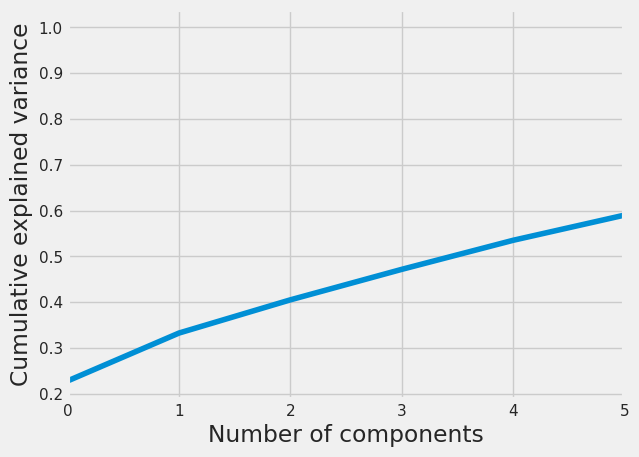

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
print(Y_sklearn)

[[ 6.50569125 -1.64242041 -0.60502626  0.25569389  2.58675287]
 [-1.0921856   0.03751109  0.29124428  0.10575961 -0.84617986]
 [ 1.93125336 -3.41485056  2.67463916  1.0527738  -2.23075127]
 ...
 [-0.79963386 -0.26731287 -0.02982969  0.56422966  0.89806486]
 [-1.17330562 -0.09171242 -0.27471216 -0.23128367  1.28709758]
 [ 0.18595455  1.86573962 -0.60686672 -0.89028782  0.73973466]]


In [ ]:
Y_sklearn.shape

(312, 5)

# Split Data

In [134]:
df.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_1,Edema_2,Edema_3,Drug,Sex,Ascites,Hepatomegaly,Spiders,Status
0,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,1,0,0,0,0,1,1,1,2
1,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0,1,0,0,0,0,1,1,0
2,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,0,1,0,1,0,0,0,2
3,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0,0,1,0,0,0,1,1,2
4,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,0,1,0,1,0,0,1,1,1


In [135]:
X = df.drop(['Status'], axis=1)
y = df[['Status']]

In [136]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

# Model

# Naive Bayes
sc = https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#18.-ROC---AUC-

In [137]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train , y_train)

MultinomialNB()

In [138]:
y_pred = classifier.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6825


In [140]:
acc_nb = accuracy_score(y_test, y_pred)
acc_nb

0.6825396825396826

In [141]:
y_pred_train = classifier.predict(X_train)

In [142]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6024


In [143]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.6024
Test set score: 0.6825


In [144]:
# check class distribution in test set
y_test.value_counts()

Status
0         34
2         25
1          4
dtype: int64

In [145]:
# check null accuracy score
null_accuracy = (374/(374+194))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6585


In [146]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[23  8  3]
 [ 1  3  0]
 [ 6  2 17]]

True Positives(TP) =  23

True Negatives(TN) =  3

False Positives(FP) =  8

False Negatives(FN) =  1


In [147]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.37      0.50       194
           1       0.74      0.95      0.84       374

    accuracy                           0.75       568
   macro avg       0.78      0.66      0.67       568
weighted avg       0.77      0.75      0.72       568



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7535


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2465


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.3660


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8068


In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = classifier.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.48713844, 0.51286156],
       [0.24824095, 0.75175905],
       [0.26668959, 0.73331041],
       [0.28452053, 0.71547947],
       [0.26668959, 0.73331041],
       [0.25295355, 0.74704645],
       [0.25295355, 0.74704645],
       [0.46931476, 0.53068524],
       [0.24824095, 0.75175905],
       [0.24824095, 0.75175905]])

In [ ]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Sedikit', 'Prob of Banyak'])
y_pred_prob_df

,Prob of - Sedikit,Prob of Banyak
0,0.487138,0.512862
1,0.248241,0.751759
2,0.266690,0.733310
3,0.284521,0.715479
4,0.266690,0.733310
5,0.252954,0.747046
6,0.252954,0.747046
7,0.469315,0.530685
8,0.248241,0.751759
9,0.248241,0.751759


In [ ]:
# store the predicted probabilities for class 1 - Probability of Banyak
y_pred1 = classifier.predict_proba(X_test)[:, 1]

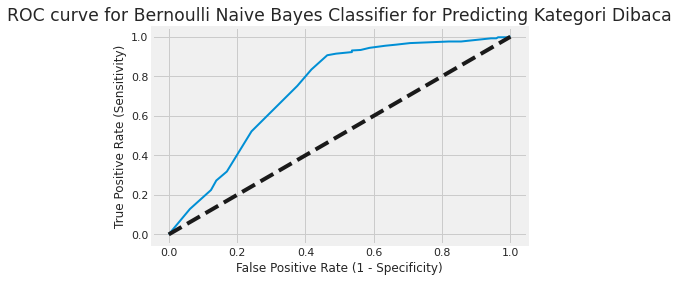

In [ ]:
# plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1 )

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Bernoulli Naive Bayes Classifier for Predicting Kategori Dibaca')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7323


In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.70044053 0.72246696 0.69162996 0.71806167 0.69162996 0.70484581
 0.73127753 0.77092511 0.69162996 0.72123894]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7144


# Reg Log 1

In [148]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.746031746031746
Confusion Matrix : 
[[29  0  5]
 [ 2  0  2]
 [ 7  0 18]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.85      0.81        34
           1       0.00      0.00      0.00         4
           2       0.72      0.72      0.72        25

    accuracy                           0.75        63
   macro avg       0.49      0.52      0.51        63
weighted avg       0.70      0.75      0.72        63



# Reg log 2 ++
sc : https://www.kaggle.com/code/prashant111/logistic-regression-classifier-

Hyperparameter : https://stackoverflow.com/questions/67513075/what-is-c-parameter-in-sklearn-logistic-regression

In [149]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [150]:
y_pred_test = logreg.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7619


In [152]:
#Akurasi
acc_lr = accuracy_score(y_test, y_pred_test)
acc_lr

0.7619047619047619

In [153]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2])

In [154]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7671


In [155]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7671
Test set score: 0.7619


In [156]:
# fit the Logsitic Regression model with C=100
# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [157]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7912
Test set score: 0.7619


In [158]:
# fit the Logsitic Regression model with C=0.01
# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [159]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7671
Test set score: 0.7778


In [160]:
# check class distribution in test set
y_test.value_counts()

Status
0         34
2         25
1          4
dtype: int64

In [161]:
# check null accuracy score
null_accuracy = (374/(374+194))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6585


In [162]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[29  0  5]
 [ 3  0  1]
 [ 6  0 19]]

True Positives(TP) =  29

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  3


In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81        34
           1       0.00      0.00      0.00         4
           2       0.76      0.76      0.76        25

    accuracy                           0.76        63
   macro avg       0.51      0.54      0.52        63
weighted avg       0.71      0.76      0.74        63



#Reglog Estimation

In [164]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [165]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [166]:
# Define the negative log-likelihood function
def neg_log_likelihood(beta, X, y):
    z = X @ beta
    h = sigmoid(z)
    n = len(y)
    ll = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return ll

In [167]:
# Initialize the coefficients
beta0 = np.zeros(X.shape[1])
beta0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
# Optimize the negative log-likelihood function
result = minimize(neg_log_likelihood, beta0, args=(X, y), method='BFGS')
beta = result.x
beta

In [ ]:
# Make predictions
z = X @ beta
h = sigmoid(z)
predictions = [1 if p >= 0.5 else 0 for p in h]

#KNN 1

In [169]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.6666666666666666
Confusion Matrix : 
[[26  0  8]
 [ 3  0  1]
 [ 9  0 16]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        34
           1       0.00      0.00      0.00         4
           2       0.64      0.64      0.64        25

    accuracy                           0.67        63
   macro avg       0.44      0.47      0.45        63
weighted avg       0.62      0.67      0.64        63



# KNN 2 ++
sc = https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [170]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,100):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [171]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [172]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 69.84126984126983 % and k = [2]


In [173]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,100),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),test_scores,marker='o',label='Test Score')

TypeError: ignored

<Figure size 1200x500 with 0 Axes>

In [174]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(26)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6666666666666666

In [175]:
#Akurasi
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.6666666666666666

IndexError: ignored

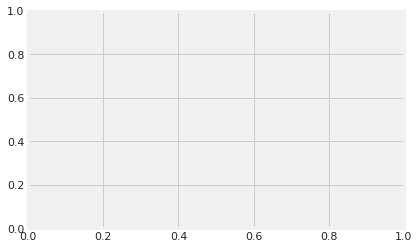

In [ ]:
value = 20
width = 20
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={-5: value,-4: value,-3: value,-2: value, -1: value, 0: value, 1: value, 2: value, 3: value, 4: value, 5: value, 6: value, 7: value, 8: value, 9: value, 10: value, 11: value, 12: value},
                      filler_feature_ranges={-5: width,-4: width,-3: width,-2: width, -1: width, 0: width, 1: width, 2: width, 3: width, 4: width, 5: width, 6: width, 7: width, 8: width, 9: width, 10: width, 11: width, 12: width},
                      X_highlight=X_test.values)

# Adding axes annotations
plt.title('KNN with Data Berita')
plt.show()

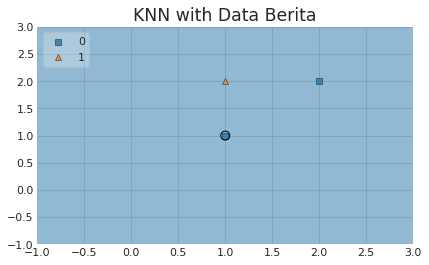

In [ ]:
value = 20
width = 20
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={  -1: value, 0: value, 1: value, 2: value, 3: value},
                      filler_feature_ranges={ -1: width, 0: width, 1: width, 2: width, 3: width},
                      X_highlight=X_test.values)

# Adding axes annotations
plt.title('KNN with Data Berita')
plt.show()

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,99,160,259
1,48,424,472
All,147,584,731


Text(0.5, 18.5, 'Predicted label')

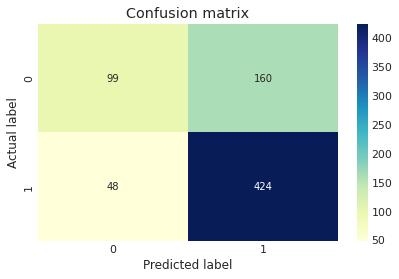

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.38      0.49       259
           1       0.73      0.90      0.80       472

    accuracy                           0.72       731
   macro avg       0.70      0.64      0.65       731
weighted avg       0.71      0.72      0.69       731



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

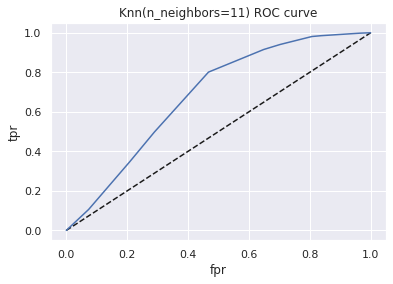

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6815612525358288

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.6817300376665479
Best Parameters: {'n_neighbors': 34}


# Decision Tree 1 ++

In [176]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.6031746031746031
Confusion Matrix : 
[[21  2 11]
 [ 3  0  1]
 [ 6  2 17]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        34
           1       0.00      0.00      0.00         4
           2       0.59      0.68      0.63        25

    accuracy                           0.60        63
   macro avg       0.43      0.43      0.43        63
weighted avg       0.61      0.60      0.60        63



# Decision Tree 2

In [177]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [178]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [179]:
y_pred_gini = clf_gini.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6825


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7298


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7298
Test set score: 0.7377


[Text(0.5, 0.875, 'X[3] <= 0.5\ngini = 0.45\nsamples = 2269\nvalue = [777, 1492]'),
 Text(0.25, 0.625, 'X[2] <= 0.5\ngini = 0.413\nsamples = 2058\nvalue = [600, 1458]'),
 Text(0.125, 0.375, 'X[4] <= 0.5\ngini = 0.38\nsamples = 1791\nvalue = [456, 1335]'),
 Text(0.0625, 0.125, 'gini = 0.34\nsamples = 847\nvalue = [184, 663]'),
 Text(0.1875, 0.125, 'gini = 0.41\nsamples = 944\nvalue = [272, 672]'),
 Text(0.375, 0.375, 'X[2] <= 1.5\ngini = 0.497\nsamples = 267\nvalue = [144, 123]'),
 Text(0.3125, 0.125, 'gini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 243\nvalue = [121, 122]'),
 Text(0.75, 0.625, 'X[3] <= 1.5\ngini = 0.27\nsamples = 211\nvalue = [177, 34]'),
 Text(0.625, 0.375, 'X[1] <= 0.5\ngini = 0.239\nsamples = 195\nvalue = [168, 27]'),
 Text(0.5625, 0.125, 'gini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.6875, 0.125, 'gini = 0.222\nsamples = 165\nvalue = [144, 21]'),
 Text(0.875, 0.375, 'X[2] <= 1.5\ngini = 0.492\nsamples = 16\nvalue = 

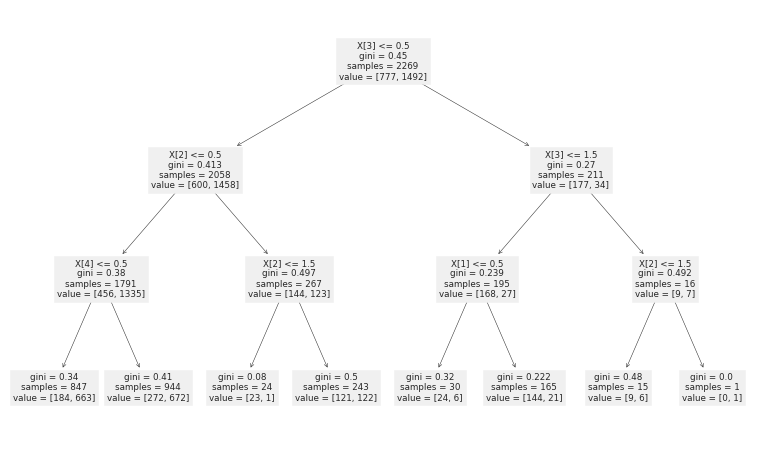

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

TypeError: ignored

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7447


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7307


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7307
Test set score: 0.7447


[Text(0.5, 0.875, 'X[14] <= 0.5\nentropy = 0.937\nsamples = 2920\nvalue = [1033, 1887]'),
 Text(0.25, 0.625, 'X[6] <= 0.5\nentropy = 0.901\nsamples = 2724\nvalue = [864, 1860]'),
 Text(0.125, 0.375, 'X[0] <= 0.5\nentropy = 0.999\nsamples = 552\nvalue = [264, 288]'),
 Text(0.0625, 0.125, 'entropy = 0.992\nsamples = 343\nvalue = [153, 190]'),
 Text(0.1875, 0.125, 'entropy = 0.997\nsamples = 209\nvalue = [111, 98]'),
 Text(0.375, 0.375, 'X[12] <= 0.5\nentropy = 0.85\nsamples = 2172\nvalue = [600, 1572]'),
 Text(0.3125, 0.125, 'entropy = 0.98\nsamples = 36\nvalue = [21, 15]'),
 Text(0.4375, 0.125, 'entropy = 0.843\nsamples = 2136\nvalue = [579, 1557]'),
 Text(0.75, 0.625, 'X[4] <= 0.5\nentropy = 0.578\nsamples = 196\nvalue = [169, 27]'),
 Text(0.625, 0.375, 'X[6] <= 0.5\nentropy = 0.495\nsamples = 120\nvalue = [107, 13]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.506\nsamples = 116\nvalue = [103, 13]'),
 Text(0.875, 0.375, 'X[9] 

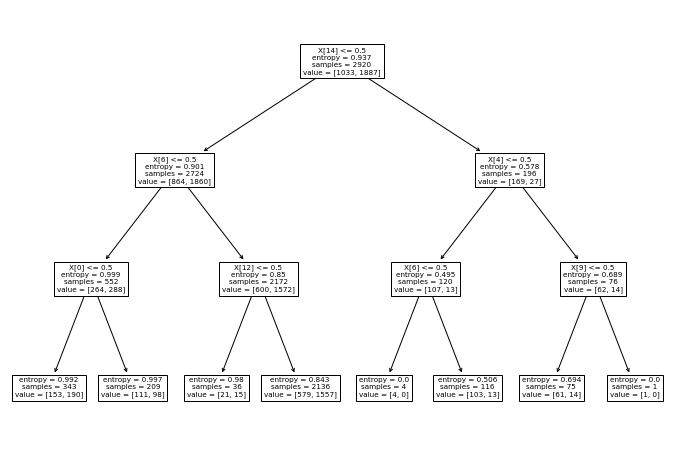

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

KeyError: ignored

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

# Random Forest 1 ++

In [181]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.746031746031746
Confusion Matrix : 
[[31  0  3]
 [ 2  0  2]
 [ 9  0 16]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        34
           1       0.00      0.00      0.00         4
           2       0.76      0.64      0.70        25

    accuracy                           0.75        63
   macro avg       0.50      0.52      0.50        63
weighted avg       0.70      0.75      0.72        63



# Random Forest 2

In [182]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [183]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [184]:
clf.predict([[1,0,1,1,1]])

ValueError: ignored

# Random Forest 3

In [185]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [186]:
y_pred = rf_model.predict(X_test)

In [187]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


Text(0.5, 18.5, 'Predicted label')

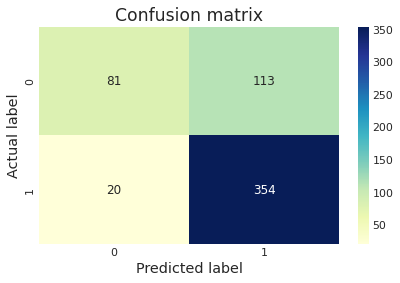

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.42      0.55       194
           1       0.76      0.95      0.84       374

    accuracy                           0.77       568
   macro avg       0.78      0.68      0.70       568
weighted avg       0.77      0.77      0.74       568



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

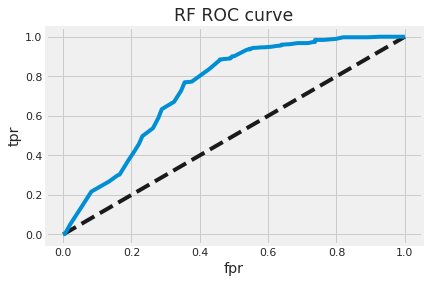

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RF ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6560366321442271

# SVM

# SVM RBF KERNEL

In [188]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with default hyperparameters: 0.6190


C = 100

In [189]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7143


C = 1000

In [190]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.7460


In [191]:
y_pred_rbf = svc.predict(X_test)

acc_rbf = accuracy_score(y_test, y_pred_rbf)
acc_rbf

0.746031746031746

# SVM LINEAR KERNEL

C = 1

In [192]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7460


In [193]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7302


In [194]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.7302


In [195]:
# instantiate classifier with linear kernel and C=10000.0
linear_svc10000=SVC(kernel='linear', C=10000.0)


# fit classifier to training set
linear_svc10000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc10000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=10000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=10000.0 : 0.7302


In [219]:
y_pred_lin = linear_svc100.predict(X_test)

acc_lin = accuracy_score(y_test, y_pred_lin)
acc_lin

0.7301587301587301

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7268


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7268
Test set score: 0.7764


In [ ]:
# check class distribution in test set
y_test.value_counts()

1    374
0    194
Name: Kategori Dibaca, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (338/(338+323))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5113


# SVM POLYNOM KERNEL

In [196]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.6825


In [197]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100 : 0.7143


In [198]:
y_pred_pol = poly_svc.predict(X_test)

acc_pol = accuracy_score(y_test, y_pred_pol)
acc_pol

0.6825396825396826

In [199]:
# instantiate classifier with polynomial kernel and C=1000.0
poly_svc1000=SVC(kernel='poly', C=1000.0)


# fit classifier to training set
poly_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1000 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1000 : 0.7460


# SVM SIGMOID KERNEL

In [200]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.5397


In [201]:
y_pred_sig = sigmoid_svc.predict(X_test)

acc_sig = accuracy_score(y_test, y_pred_sig)
acc_sig

0.5396825396825397

In [202]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.5556


In [203]:
# Print the Confusion Matrix and slice it into four pieces (RBF C=1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[29  2  3]
 [ 4  0  0]
 [ 7  0 18]]

True Positives(TP) =  29

True Negatives(TN) =  0

False Positives(FP) =  2

False Negatives(FN) =  4


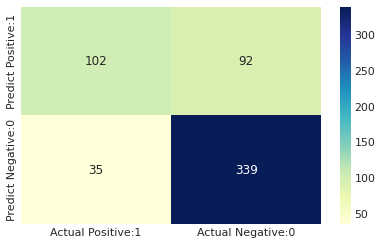

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       194
           1       0.79      0.91      0.84       374

    accuracy                           0.78       568
   macro avg       0.77      0.72      0.73       568
weighted avg       0.77      0.78      0.77       568



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7764


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2236


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.3052


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6847


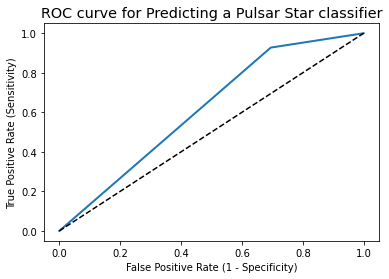

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6163


In [ ]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.6165


# CROSS VALID SVM

In [204]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

NameError: ignored

In [ ]:
# print cross-validation scores with rbf kernel

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified cross-validation scores with rbf kernel:

[0.75176056 0.7306338  0.71957672 0.73897707 0.76895944]


In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.7420


HYPERPARAMETER OPT

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

AttributeError: ignored

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7155


#Ada Boost

In [205]:
dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.6666666666666666
Confusion Matrix : 
[[26  0  8]
 [ 3  0  1]
 [ 6  3 16]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        34
           1       0.00      0.00      0.00         4
           2       0.64      0.64      0.64        25

    accuracy                           0.67        63
   macro avg       0.46      0.47      0.46        63
weighted avg       0.65      0.67      0.66        63



# Gradient Boosting

In [206]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.7619047619047619
Confusion Matrix : 
[[30  0  4]
 [ 2  0  2]
 [ 7  0 18]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        34
           1       0.00      0.00      0.00         4
           2       0.75      0.72      0.73        25

    accuracy                           0.76        63
   macro avg       0.51      0.53      0.52        63
weighted avg       0.71      0.76      0.74        63



# XG Boost

In [207]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.7142857142857143
Confusion Matrix : 
[[27  1  6]
 [ 2  0  2]
 [ 7  0 18]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        34
           1       0.00      0.00      0.00         4
           2       0.69      0.72      0.71        25

    accuracy                           0.71        63
   macro avg       0.48      0.50      0.49        63
weighted avg       0.68      0.71      0.70        63



# Cat Boost

In [211]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.8376780	total: 52.8ms	remaining: 5.22s
1:	learn: 0.7162225	total: 56ms	remaining: 2.74s
2:	learn: 0.6306209	total: 61.7ms	remaining: 1.99s
3:	learn: 0.5835030	total: 69ms	remaining: 1.65s
4:	learn: 0.5369067	total: 74.2ms	remaining: 1.41s
5:	learn: 0.5066800	total: 79.4ms	remaining: 1.24s
6:	learn: 0.4820017	total: 84.6ms	remaining: 1.12s
7:	learn: 0.4446262	total: 89.8ms	remaining: 1.03s
8:	learn: 0.4224506	total: 95ms	remaining: 960ms
9:	learn: 0.4011602	total: 100ms	remaining: 900ms
10:	learn: 0.3913302	total: 105ms	remaining: 852ms
11:	learn: 0.3698745	total: 110ms	remaining: 809ms
12:	learn: 0.3543320	total: 115ms	remaining: 772ms
13:	learn: 0.3331204	total: 120ms	remaining: 739ms
14:	learn: 0.3240690	total: 126ms	remaining: 713ms
15:	learn: 0.3118489	total: 131ms	remaining: 688ms
16:	learn: 0.3045506	total: 141ms	remaining: 688ms
17:	learn: 0.2951681	total: 147ms	remaining: 670ms
18:	learn: 0.2873036	total: 154ms	remaining: 657ms
19:	learn: 0.

In [212]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.7777777777777778
Confusion Matrix : 
[[31  0  3]
 [ 2  1  1]
 [ 8  0 17]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        34
           1       1.00      0.25      0.40         4
           2       0.81      0.68      0.74        25

    accuracy                           0.78        63
   macro avg       0.86      0.61      0.66        63
weighted avg       0.79      0.78      0.76        63



#Extra Tree Classifier

In [213]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.746031746031746
Confusion Matrix : 
[[30  0  4]
 [ 1  0  3]
 [ 8  0 17]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        34
           1       0.00      0.00      0.00         4
           2       0.71      0.68      0.69        25

    accuracy                           0.75        63
   macro avg       0.49      0.52      0.51        63
weighted avg       0.70      0.75      0.72        63



# LGBM

In [214]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 249, number of used features: 19
[LightGBM] [Info] Start training from score -0.619613
[LightGBM] [Info] Start training from score -2.809403
[LightGBM] [Info] Start training from score -0.912283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

# Neural Network

In [225]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64,activation = 'relu', input_shape=(None, 20)),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, None, 64)          1344      
                                                                 
 dense_5 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [226]:
# Compile and run the model
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(), optimizer="adam", metrics=["accuracy",tf.keras.metrics.Precision()])

In [227]:
history = model.fit(X_train,y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 45ms/step - loss: 216.5544 - accuracy: 0.0602 - precision_2: 0.4618 - val_loss: 213.3673 - val_accuracy: 0.0635 - val_precision_2: 0.4603
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 110.2264 - accuracy: 0.0602 - precision_2: 0.4618 - val_loss: 117.4990 - val_accuracy: 0.0635 - val_precision_2: 0.4603
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 38.6806 - accuracy: 0.0602 - precision_2: 0.4618 - val_loss: 20.1351 - val_accuracy: 0.0635 - val_precision_2: 0.4603
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: -39.3477 - accuracy: 0.1124 - precision_2: 0.4784 - val_loss: -14.7591 - val_accuracy: 0.0952 - val_precision_2: 0.4561
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: -70.4216 - accuracy: 0.1486 - precision_2: 0.5022 - val_loss: -52.6351 - val_accuracy: 0.1111 - val_precision_2: 0.4655
Epoch 6/100
8/8 [=============================

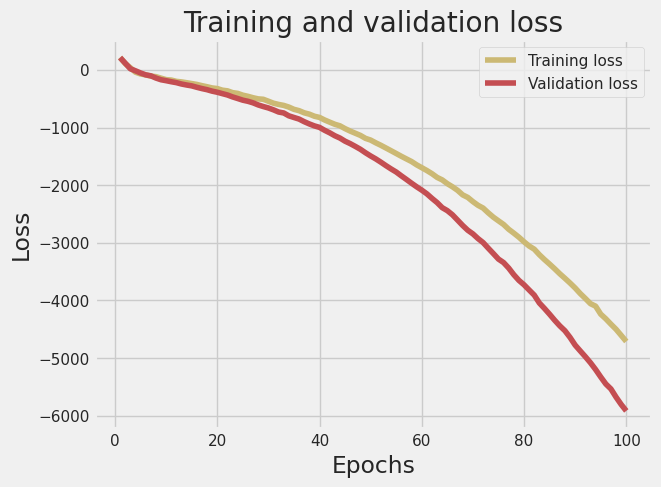

In [228]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

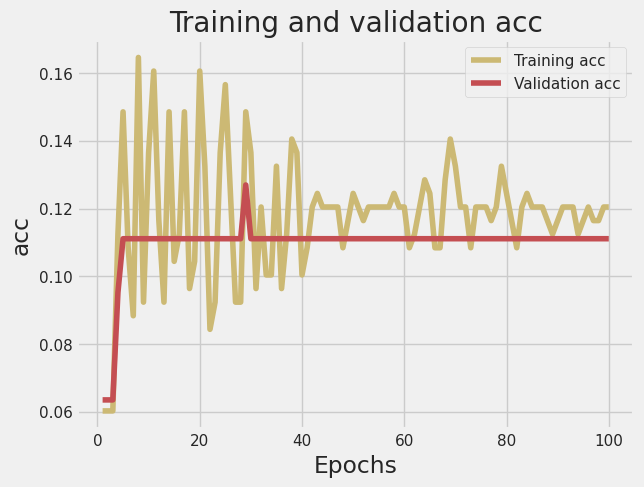

In [229]:
#plot the training and validation accuracy at each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [230]:
#Evaluate the model

eval = model.evaluate(X_test,y_test)

print('\nAccuracy: {}\nPrecision: {}\nloss: {}'.format(eval[1], eval[2], eval[0]))

2/2 [==============================] - 0s 7ms/step - loss: -5919.3711 - accuracy: 0.1111 - precision_2: 0.4833

Accuracy: 0.1111111119389534
Precision: 0.4833333194255829
loss: -5919.37109375


In [232]:
# Predict and inverse the ended label to their true value
prediction = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [233]:
acc_nn = eval[2]
acc_nn

0.4833333194255829

In [235]:
prediction

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [236]:
# Load the test label to compare it
test_label = np.argmax(y_test, axis=-1)

# Model Comparison

In [ ]:

models = pd.DataFrame({
    'Model' : ['Naive Bayes','Logistic Regression', 'KNN', 'Decision Tree Classifier', 'SVM RBF C 100', 'SVM Linear C `10000', 'SVM Poly C 100', 'SVM Sigmoid','Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM' , 'NN'],
    'Score' : [acc_nb,acc_lr, acc_knn, acc_dtc, acc_rbf, acc_lin, acc_pol , acc_sig ,acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, acc_nn]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Naive Bayes,0.779930
10,Gradient Boosting Classifier,0.772887
3,Decision Tree Classifier,0.771127
6,SVM Poly C 100,0.771127
9,Ada Boost Classifier,0.769366
13,Extra Trees Classifier,0.769366
1,Logistic Regression,0.767606
4,SVM RBF C 100,0.767606
8,Random Forest Classifier,0.767606
14,LGBM,0.765845
